0. Download and install modules from : https://github.com/SpikeInterface

In [1]:
%matplotlib tk
import matplotlib
%autosave 180
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.gridspec as gridspec


import matplotlib.cm as cm

import numpy as np
import os

import h5py



Autosaving every 180 seconds


In [2]:
import spikeextractors as se
import spikesorters as ss
import spikecomparison as sc
import spikewidgets as sw
import spikeinterface.toolkit as st

import numpy as np
import matplotlib.pylab as plt
import scipy.signal

In [3]:

from pathlib import Path

path = Path('/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/h5_files/')

rec_paths = sorted([p for p in path.iterdir() if p.suffix == '.h5'])

recompute = True
recordings = []
for i, rec in enumerate(rec_paths):
    print ("rec: ", rec)
    recording = se.Mea1kRecordingExtractor(rec)
    if i == 0:
        channel_order = recording.get_channel_ids()
        recording_sorted = recording
    else:
        recording_sorted = se.SubRecordingExtractor(recording, channel_ids=channel_order)
    recordings.append(recording_sorted)

    multirec = se.MultiRecordingTimeExtractor(recordings)
    multirec.write_to_binary_dat_format('/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/h5_files/recording.dat')

    break
    
#and then I proceed with wpike sorting multirec

rec:  /mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/h5_files/mea_20190502_141044.raw.h5
Chip version: 20170126


In [8]:
data_ = np.fromfile('/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/h5_files/recording.dat','float64',20000*934*10)
print (data_.shape)
data2d = data_.reshape(-1,934)
print (data2d.shape)

(186800000,)
(200000, 934)


In [3]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


In [15]:
from scipy.signal import freqz

geom = np.loadtxt('/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/geom.txt')

data_int16 = np.fromfile('/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data/mea_20190502_140013.raw.bin',
                         'int16',20000*934*1)
#data_int16 = np.fromfile('/media/cat/4TBSSD/felix/data.bin','uint16',20000*934*1)
#data_int16 = np.fromfile('/home/cat/Downloads/mea_20190502_140013.raw.all.redone.2sec.bin','int16')
#data_int16 = np.fromfile('/home/cat/Downloads/mea_20190502_140013.raw.all.2sec.bin','int16')
data2d = np.int16(data_int16).reshape(-1,934)
print (data2d.shape)
    
lowcut=300
highcut=5000
fs = 20000
for k in range(data2d.shape[1]):
    filtered = butter_bandpass_filter(data2d[:,k],lowcut,highcut,fs)  
    data2d[:,k] = filtered
    
data2d.tofile('/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data/mea_20190502_140013.raw.1sec.bin')

(20000, 934)


In [7]:
templates = np.load('/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/tmp/nn_train/augment/templates/templates.npy')
print (templates.shape)
geom = np.loadtxt('/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/geom.txt')

(175, 161, 934)


In [14]:
import matplotlib.pyplot as plt
ptps = templates.ptp(1).max(1)
idx = np.where(ptps>16.0)[0]
templates=templates[idx]
print ("larger templates; ", templates.shape)
unit = 0

#for k in range(geom.shape[0]):
#print (channel_ids)
#idx = np.argsort(channel_ids)
width = templates.shape[1]
offset = 5000-50
yscale = 1

#width = templates.shape[1]
for k in np.arange(templates.shape[2]):    
    plt.plot(geom[k,0]+np.arange(width)/(width/5), 
             #templates[unit,:,k]/yscale+geom[k,1],c='black')
             data2d[offset:offset+width,k]/yscale+geom[k,1],c='black')
plt.show()

larger templates;  (21, 161, 934)


In [11]:
for k in range(100):
    plt.plot(data2d[:5000,k]+k*10, c='black')
plt.show()

In [13]:
data = multirec.get_traces()

MemoryError: Unable to allocate 125. GiB for an array with shape (934, 17908200) and data type float64

In [3]:
import numpy as np
data = np.fromfile('/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/mea_20190502_140013.raw.all.bin',
                  'int16',20000*934*2)
data.tofile('/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/mea_20190502_140013.raw.all.2sec.bin')

In [ ]:
data_int16 = np.int16(data)

In [ ]:
np.save('/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/mea_20190502_140013.raw.all.redone.bin',data_int16)

In [12]:
fnames = [
'/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/h5_files/mea_20190502_140013.raw.h5',
'/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/h5_files/mea_20190502_140614.raw.h5',
'/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/h5_files/mea_20190502_141044.raw.h5',
'/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/h5_files/mea_20190502_141546.raw.h5',
'/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/h5_files/mea_20190502_143106.raw.h5',
'/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/h5_files/mea_20190502_144649.raw.h5',
'/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/h5_files/mea_20190502_145006.raw.h5',
'/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/h5_files/mea_20190502_150529.raw.h5' 
    
]




In [14]:
# MAKE RAW BIN FILES
for fname in fnames:
    fname_out = fname[:-3]+'.bin'
    if os.path.exists(fname_out)==False:
        print ("loading: ", fname)
        f = h5py.File(fname, 'r')
        mapping = f['ephys']['mapping']
        #channel = mapping['channel']
        channel_ids = mapping['channel']
        sorted_idx = np.argsort(channel_ids)

        # load raw traces
        traces = f['ephys']['signal']
        
        # read non-zero traces
        recordings = traces[np.sort(channel_ids)]
        print ("recordings: ", recordings.shape)

        # sort traces based on geometry file:
        recordings = recordings[sorted_idx]

        data2 = np.int16(recordings).T
        print ("saving ", data2.shape, type(data2[0,0]))

        data2.tofile(fname_out)



loading:  /mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/h5_files/mea_20190502_140013.raw.h5
recordings:  (934, 4589200)
saving  (4589200, 934) <class 'numpy.int16'>
loading:  /mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/h5_files/mea_20190502_140614.raw.h5
recordings:  (934, 5075800)
saving  (5075800, 934) <class 'numpy.int16'>
loading:  /mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/h5_files/mea_20190502_141044.raw.h5
recordings:  (934, 3135800)
saving  (3135800, 934) <class 'numpy.int16'>
loading:  /mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/h5_files/mea_20190502_141546.raw.h5
recordings:  (934, 17908200)
saving  (17908200, 934) <class 'numpy.int16'>
loading:  /mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/h5_files/mea_20190502_143106.raw.h5
recordings:  (934, 17907600)
saving  (17907600, 934) <class 'numpy.int16'>
loading:  /mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/h5_files/mea_20190502_144649.raw.h5
recordings:  (934, 3135800)
saving  (3135800, 934) <class 'numpy.in

In [10]:
# MAKE FRAME NUBERS
for fname in fnames:
    print ("loading: ", fname)
    f = h5py.File(fname, 'r')
    #mapping = f['ephys']['mapping']
    #channel = mapping['channel']

    frame_numbers = f['ephys']['frame_numbers']
    #data2 = np.int16(data)[channel].T
    print ("frame_numbers ", frame_numbers.shape, frame_numbers)

    np.save(fname[:-3]+'_frame_numbers.npy', frame_numbers)
    #data2.tofile(fname[:-3]+'.bin')
print ("DONE")

loading:  /media/cat/12TB/felix/data/mea_20190502_140013.raw.h5
frame_numbers  (4589200,) <HDF5 dataset "frame_numbers": shape (4589200,), type "<u8">
loading:  /media/cat/12TB/felix/data/mea_20190502_140614.raw.h5
frame_numbers  (5075800,) <HDF5 dataset "frame_numbers": shape (5075800,), type "<u8">
loading:  /media/cat/12TB/felix/data/mea_20190502_141044.raw.h5
frame_numbers  (3135800,) <HDF5 dataset "frame_numbers": shape (3135800,), type "<u8">
loading:  /media/cat/12TB/felix/data/mea_20190502_141546.raw.h5
frame_numbers  (17908200,) <HDF5 dataset "frame_numbers": shape (17908200,), type "<u8">
loading:  /media/cat/12TB/felix/data/mea_20190502_143106.raw.h5
frame_numbers  (17907600,) <HDF5 dataset "frame_numbers": shape (17907600,), type "<u8">
loading:  /media/cat/12TB/felix/data/mea_20190502_144649.raw.h5
frame_numbers  (3135800,) <HDF5 dataset "frame_numbers": shape (3135800,), type "<u8">
loading:  /media/cat/12TB/felix/data/mea_20190502_145006.raw.h5
frame_numbers  (17909400,)

In [18]:
# COMBINE MULTIPLE .BIN FILES
fnames = [
'/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data/mea_20190502_140013.raw.bin',
'/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data/mea_20190502_140614.raw.bin',
'/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data/mea_20190502_141044.raw.bin',
'/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data/mea_20190502_141546.raw.bin',
'/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data/mea_20190502_143106.raw.bin',
'/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data/mea_20190502_144649.raw.bin',
'/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data/mea_20190502_145006.raw.bin',
'/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data/mea_20190502_150529.raw.bin'    
]


In [19]:
# Append-adds at last 
import numpy as np
file1 = open("/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/mea_20190502_140013.raw.all.redone.bin", "ab")  # append mode 

for fname in fnames:
    print ("reading: ", fname)
    data =np.fromfile(fname,'int16')
    print ("...writing")
    file1.write(data) 
file1.close() 

reading:  /mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data/mea_20190502_140013.raw.bin
...writing
reading:  /mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data/mea_20190502_140614.raw.bin
...writing
reading:  /mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data/mea_20190502_141044.raw.bin
...writing
reading:  /mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data/mea_20190502_141546.raw.bin
...writing
reading:  /mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data/mea_20190502_143106.raw.bin
...writing
reading:  /mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data/mea_20190502_144649.raw.bin
...writing
reading:  /mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data/mea_20190502_145006.raw.bin
...writing
reading:  /mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data/mea_20190502_150529.raw.bin
...writing


In [20]:
file1.close() 

In [21]:
data1 = np.fromfile('/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/mea_20190502_140013.raw.all.bin','int16',20000*934*10)
data1_2D = data1.reshape(-1, 934)

data2 = np.fromfile('/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/mea_20190502_140013.raw.all.redone.bin', 'int16', 20000*934*10)
data2_2D = data2.reshape(-1,934)



In [24]:
for k in range(10):
    ax=plt.subplot(2,1,1)
    plt.plot(data1_2D[:5000, k]+k*10, c='black')
    ax2=plt.subplot(2,1,2)
    plt.plot(data2_2D[:5000, k]+k*10, c='black')
plt.show()

/home/cat/anaconda3/envs/spikingforest/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/cat/anaconda3/envs/spikingforest/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/home/cat/anaconda3/envs/spikingforest/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarn

In [35]:
data = f['ephys']['signal']
print (data.shape)
print (type(data[0,0]))
frate = f['ephys']['frame_rate']

(1024, 3135800)
<class 'numpy.uint16'>


In [40]:
print (type(data[0,0]))
fig=plt.figure()
for k in range(10):
    print (k)
    y = np.histogram(data[k,:20000*10],bins=np.arange(0,32000,100))
    plt.plot(y[1][:-1],y[0])
plt.semilogy()
plt.show()

<class 'numpy.uint16'>
0
1
2
3
4
5
6
7
8
9


In [17]:
mapping = f['ephys']['mapping']

x = mapping['x']
y = mapping['y']
channel = mapping['channel']
print (channel.shape)
print (x.shape)

geom = np.vstack((x,y)).T
print (geom.shape)

#np.savetxt('/media/cat/4TBSSD/felix/geom.txt', geom)

(934,)
(934,)
(934, 2)


In [18]:
print (frate.value)
np.array(data)[channel].tofile("/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data.bin")

/home/cat/anaconda3/envs/spikingforest/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


[20000.]


In [21]:
data_read = np.fromfile('/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data.bin','int16')
print (data_read.shape, type(data_read[0]))

(2928837200,) <class 'numpy.int16'>


In [24]:
data_2D = data_read.reshape(934,-1).T
print (data_2D.shape)

data_2D.tofile('/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data_int16.bin')

(3135800, 934)


In [30]:
data = np.fromfile('/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/data_int16.bin','int16')
print (data.shape)

(2928837200,)


In [31]:
data_2D = data.reshape(-1,934)

In [41]:
for k in range(10):
    plt.plot(data_2D[:20000,k]+k*10)
plt.show()

In [17]:
# Sample rate and desired cutoff frequencies (in Hz).
fs = 20000.0
lowcut = 300.0
highcut = 6000.0

from scipy.signal import freqz
    
for k in range(data.shape[0]):
    filtered = butter_bandpass_filter(data[k,10000:15000],lowcut,highcut,fs)  
    plt.plot(filtered+k*10,c='black')
plt.show()

In [12]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y




In [11]:
import sys, os
sys.path.append(os.getcwd() + '/../spikeextractors')
sys.path.append(os.getcwd() + '/../spikesorters')
sys.path.append(os.getcwd() + '/../spikecomparison')
sys.path.append(os.getcwd() + '/../spikewidgets')
sys.path.append(os.getcwd() + '/../spikeinterface')

1. Import modules

In [9]:
import spikeextractors as se
import spikesorters as ss
import spikecomparison as sc
import spikewidgets as sw
import spikeinterface.toolkit as st

import numpy as np
import matplotlib.pylab as plt
import scipy.signal

2. Load a test file:

In [9]:
test_file_name = '/home/cat/Downloads/mea_20190502_140013.raw.h5'
    
recording = se.Mea1kRecordingExtractor(test_file_name) #(or MaxOneRecordingExtractor)

Chip version: 20170126


In [10]:
recording_bp = st.preprocessing.bandpass_filter(recording, freq_min=300, freq_max=6000)
recording_car = st.preprocessing.common_reference(recording, reference='average')

Plot some raw data:

In [12]:
sw.plot_timeseries(recording_bp, trange=[1,2], channel_ids=[0,1,2,3])
plt.show()

In [ ]:
print (recording.get_traces())



In [ ]:
traces = recording_bp.get_traces().shape

Alternatively, to see how raw traces are accessed:

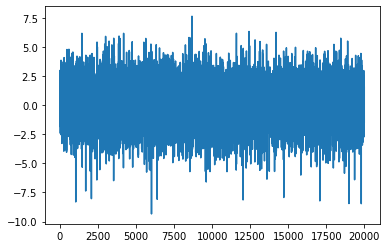

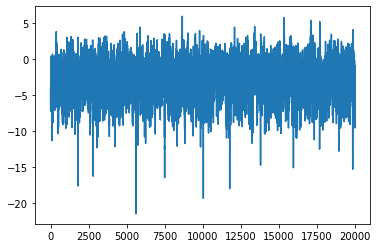

In [28]:
%matplotlib inline
fig1, ax1 = plt.subplots()
ax1.plot(recording_bp.get_traces(channel_ids=0, start_frame=20000, end_frame=40000)[0])

fig2, ax2 = plt.subplots()
ax2.plot(recording_car.get_traces(channel_ids=0, start_frame=20000, end_frame=40000)[0])

Plot the electrode configuration:

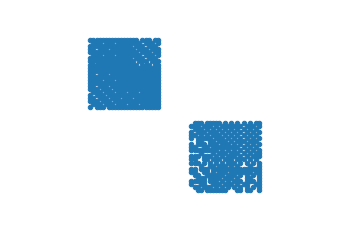

In [29]:
sw.plot_electrode_geometry(recording)

3. Start HDsort (same as Mysort) spike-sorter.
This requires the spike-sorter to be set up correctly in the background. HDsort is written in Matlab.

In [30]:
params = ss.get_default_params('hdsort')
print(params)

{'detect_threshold': 4.2, 'detect_sign': -1, 'filter': True, 'parfor': True, 'hpf': 300, 'lpf': 7000, 'n_pc_dims': 6, 'chunk_size': 500000, 'loop_mode': 'local_parfor'}


In [7]:
sort_hd = ss.run_hdsort(recording, **params)

Using Mea1k format
RUNNING SHELL SCRIPT: /var/folders/lk/jnqk24c91y71djhsqpyp39z4003ztn/T/tmp_shellscript89wx569d/script.sh


In [9]:
print(sort_hd)

In [21]:
unit_id = sort_hd.get_unit_ids()
st = sort_hd.get_unit_spike_train(unit_id[0])

(1524, 101, 934)
(301170, 2)


In [49]:
fig = plt.figure()
for k in range(10):
    print (k)
    ax=plt.subplot(10,10,k+1)
    plt.plot(data[k])
    plt.xticks([])
plt.show()

0
1
2
3
4
5
6
7
8
9


(209, 101, 934)


[[  21703       0]
 [  33478       0]
 [ 126212       0]
 ...
 [1953027     208]
 [2132648     208]
 [2133747     208]]


In [59]:
tmps1 = np.load('/mnt/adfe6e7b-b77b-4731-bc9e-e639667faba4/felix/tmp/nn_train/augment/templates/templates.npy')
print (tmps1.shape)

(130, 161, 934)


In [61]:
fig=plt.figure()
for k in range(100):
    ax=plt.subplot(10,10,k+1)
    plt.plot(tmps1[0])
    plt.xticks([])
plt.show()